In [1]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np
from module import func
from module.const import *

In [20]:
imgs_dir = "imgs/2/"

path_base_img = os.path.join(imgs_dir, "base.jpg")
path_img_lst = [os.path.join(imgs_dir, "{}.jpg".format(i)) for i in range(1, 5)]

In [39]:
base = cv2.imread(path_base_img)
base = cv2.cvtColor(base, cv2.COLOR_BGR2GRAY)    
imgs = [cv2.imread(path) for path in path_img_lst]
imgs = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in imgs]

base = cv2.resize(base, IMG_SIZE)
imgs = [cv2.resize(img, IMG_SIZE) for img in imgs]

In [46]:
diffs = [func.get_diff(base, img) for img in imgs]
th = 30
diff_masks = [func.get_diff_mask(diff, th) for diff in diffs]

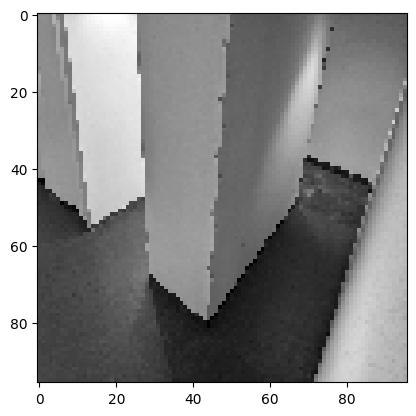

In [53]:
plt.imshow(base, cmap="gray")
# print(np.max(base))
tapple = func.CircleMaching(radius=6)
matching_lst = [tapple.get_maching(diff_mask) for diff_mask in diff_masks]
mask_matching_lst = [tapple.get_mask(maching, th=0.5) for maching in matching_lst]

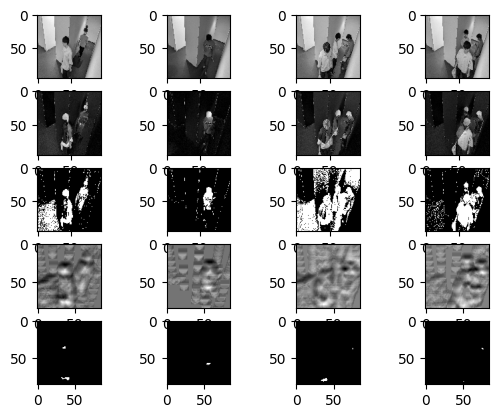

In [54]:
img_num = len(imgs)
for i, img in enumerate(imgs):
    plt.subplot(5, img_num, i + 1)
    plt.imshow(img, cmap="gray")
for i, diff in enumerate(diffs):
    plt.subplot(5, img_num, img_num + i + 1)
    plt.imshow(diff, cmap="gray")
for i, diff_mask in enumerate(diff_masks):
    plt.subplot(5, img_num, img_num * 2 + i + 1)
    plt.imshow(diff_mask, cmap="gray")
for i, matching in enumerate(matching_lst):
    plt.subplot(5, img_num, img_num * 3 + i + 1)
    plt.imshow(matching, cmap="gray")
for i, mask_matching in enumerate(mask_matching_lst):
    plt.subplot(5, img_num, img_num * 4 + i + 1)
    plt.imshow(mask_matching, cmap="gray")
plt.show()